In [4]:
import salvus.namespace as sn
from salvus.material._details import material as md
from material_ela_constants.Elastic_Material import * 


# Directories in Windows
PROJECT_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/Project'
DATA_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/data'
IMAGE_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/image'




--> Server: 'https://l.mondaic.com/licensing_server', User: 'bristol.support', Group: 'UniversityOfBristol'.
--> Negotiating 1 license instance(s) for 'SalvusMesh' [license version 1.0.0] for 1 seconds ...
--> Success! [Total duration: 0.51 seconds]


In [5]:
matl = Austenite()
material_unoriented = sn.material.elastic.hexagonal.TensorComponents.from_params(**matl.VTI_parameters())
from salvus.material._details import material as md
# Define a default orientation for comparison
orientation_of_grains_default = sn.material.orientation.ClockwiseAngle.from_params(angle_in_degrees=0)

# Convert the unoriented material with default orientation to solver form for 2D simulations
matl_background = md.to_solver_form(material_unoriented.with_orientation(orientation_of_grains_default), ndim=2)


In [5]:
material_unoriented

salvus.material.elastic.hexagonal.TensorComponents

In [6]:
orientation_angle = sn.material.orientation.ClockwiseAngle.from_params(angle_in_degrees=np.rad2deg(np.pi/6))

matl_orientated = md.to_solver_form(material_unoriented.with_orientation(orientation_angle), ndim=2)
matl_orientated

Field,Type,Value (or range)
RHO,constant,8.1e+03
C11,constant,2.5e+11
C12,constant,1.2e+11
C13,constant,2.5e+10
C22,constant,2.8e+11
C23,constant,-5e+09
C33,constant,5.7e+10


salvus.material.elastic.hexagonal._TensorComponents2D

In [7]:
np.set_printoptions(
    threshold=np.inf,   # show entire array, no summarization
    linewidth=200,      # prevent line wrapping
    suppress=False,     # set to True if you don't want scientific notation
    precision=5          # number of digits after the decimal
)
matl.rotated_tensor(np.pi/6, dim=3)


array([[ 2.54519e+11,  6.32500e+09,  1.18506e+11,  0.00000e+00,  2.49307e+10,  0.00000e+00],
       [ 6.32500e+09,  2.17100e+11,  9.83750e+10,  0.00000e+00,  7.97176e+10,  0.00000e+00],
       [ 1.18506e+11,  9.83750e+10,  2.77569e+11,  0.00000e+00, -4.96882e+09,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  9.39000e+10,  0.00000e+00, -1.99186e+10],
       [ 2.49307e+10,  7.97176e+10, -4.96882e+09,  0.00000e+00,  5.65062e+10,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, -1.99186e+10,  0.00000e+00,  1.16900e+11]])

In [8]:
matl.rotated_tensor(np.pi/6, dim=2)


array([[ 2.54519e+11,  1.18506e+11,  2.49307e+10],
       [ 1.18506e+11,  2.77569e+11, -4.96882e+09],
       [ 2.49307e+10, -4.96882e+09,  5.65062e+10]])

In [9]:
matl.C11

217100000000.0

In [9]:
import numpy as np

# example: VTI stiffness in material/principal axes (6x6 Voigt ordering [11,22,33,23,13,12])
C = matl.tensor()
# fill C with your VTI values:
# C[0,0]=C11; C[0,1]=C12; C[0,2]=C13; C[1,1]=C11; C[2,2]=C33...
# C[3,3]=C44; C[4,4]=C44; C[5,5]=C66

theta = np.pi/4   # tilt angle in radians
c = np.cos(theta); s = np.sin(theta)

L = np.array([
    [c*c, 0,   s*s, 0,     2*c*s, 0],
    [0,   1,   0,   0,     0,     0],
    [s*s, 0,   c*c, 0,    -2*c*s, 0],
    [0,   0,   0,   c,     0,    -s],
    [-c*s,0,   c*s, 0,  c*c - s*s, 0],
    [0,   0,   0,   s,     0,     c]
], dtype=float)

C_rot = L.dot(C).dot(L.T)   # rotated stiffness in global axes

# Extract 2D xz plane (Voigt indices 0->xx, 2->zz, 4->xz)
idx = [0, 2, 4]
C2D = C_rot[np.ix_(idx, idx)]

# Extract effective constants (Voigt order [11,22,33,23,13,12])
C11 = C_rot[0,0]
C12 = C_rot[0,1]
C13 = C_rot[0,2]
C22 = C_rot[1,1]
C23 = C_rot[1,2]
C33 = C_rot[2,2]
C44 = C_rot[3,3]   # corresponds to shear yz
C55 = C_rot[4,4]   # corresponds to shear xz
C66 = C_rot[5,5]   # corresponds to shear xy

print("Rotated stiffness constants (Voigt notation):")
print(f"C11 = {C11:.4e}")
print(f"C12 = {C12:.4e}")
print(f"C13 = {C13:.4e}")
print(f"C22 = {C22:.4e}")
print(f"C23 = {C23:.4e}")
print(f"C33 = {C33:.4e}")
print(f"C44 = {C44:.4e}")
print(f"C55 = {C55:.4e}")
print(f"C66 = {C66:.4e}")

print("\nC2D (xx, zz, xz):\n", C2D)


Rotated stiffness constants (Voigt notation):
C11 = 2.7468e+11
C12 = 5.2350e+10
C13 = 1.0988e+11
C22 = 2.1710e+11
C23 = 5.2350e+10
C33 = 2.7468e+11
C44 = 1.0540e+11
C55 = 4.7875e+10
C66 = 1.0540e+11

C2D (xx, zz, xz):
 [[2.74675e+11 1.09875e+11 1.15250e+10]
 [1.09875e+11 2.74675e+11 1.15250e+10]
 [1.15250e+10 1.15250e+10 4.78750e+10]]


In [10]:
import numpy as np

def rotated_stiffness(matl, theta_rad):
    """
    Compute rotated stiffness components C^R_ij from given stiffnesses and rotation angle.
    
    Parameters
    ----------
    C11, C13, C33, C55 : float
        Original stiffness coefficients.
    theta_deg : float
        Rotation angle in degrees.
        
    Returns
    -------
    dict
        Dictionary containing C^R_11, C^R_13, C^R_15, C^R_33, C^R_35, C^R_55.
    """
    C11 = matl.C11
    C13 = matl.C13
    C33 = matl.C33
    C55 = matl.C55
    θ = theta_rad
        
    alpha = C11 - 2*C13 + C33 - 4*C55
    beta = 3*C11 + 2*C13 + 3*C33 + 4*C55
    gamma = C11 - C33

    CR11 = (1/8) * (beta + 4*gamma*np.cos(2*θ) + alpha*np.cos(4*θ))
    CR13 = (1/8) * alpha*(1 - np.cos(4*θ)) + C13
    CR15 = (-1/8) * (2*gamma * np.sin(2*θ) + alpha*np.sin(4*θ))
    CR33 = (1/8) * (beta - 4*gamma*np.cos(2*θ) + alpha*np.cos(4*θ))
    CR35 = (-1/8) * (2*gamma * np.sin(2*θ) - alpha*np.sin(4*θ))
    CR55 = (1/8) * alpha*(1 - np.cos(4*θ)) + C55
    
    return {
        "C^R_11": CR11,
        "C^R_13": CR13,
        "C^R_15": CR15,
        "C^R_33": CR33,
        "C^R_35": CR35,
        "C^R_55": CR55
    }

# Example usage:
C = rotated_stiffness(matl, theta_rad=np.pi/8)
for k, v in C.items():
    print(f"{k} = {v:.3e}")


C^R_11 = 2.411e+11
C^R_13 = 1.271e+11
C^R_15 = 2.541e+10
C^R_33 = 2.737e+11
C^R_35 = -9.113e+09
C^R_55 = 6.514e+10


In [11]:
matl.rotated_tensor(np.pi/6, dim=2)


array([[ 2.54519e+11,  1.18506e+11,  2.49307e+10],
       [ 1.18506e+11,  2.77569e+11, -4.96882e+09],
       [ 2.49307e+10, -4.96882e+09,  5.65062e+10]])

In [11]:
matl.rotated_tensor(0, dim=2)


array([[2.171e+11, 1.444e+11, 0.000e+00],
       [1.444e+11, 2.632e+11, 0.000e+00],
       [0.000e+00, 0.000e+00, 8.240e+10]])

In [12]:
orientation_angle = sn.material.orientation.ClockwiseAngle.from_params(angle_in_degrees=np.rad2deg(np.pi/6))

matl_orientated = md.to_solver_form(material_unoriented.with_orientation(orientation_angle), ndim=2)
matl_orientated

Field,Type,Value (or range)
RHO,constant,8.1e+03
C11,constant,2.5e+11
C12,constant,1.2e+11
C13,constant,2.5e+10
C22,constant,2.8e+11
C23,constant,-5e+09
C33,constant,5.7e+10


salvus.material.elastic.hexagonal._TensorComponents2D

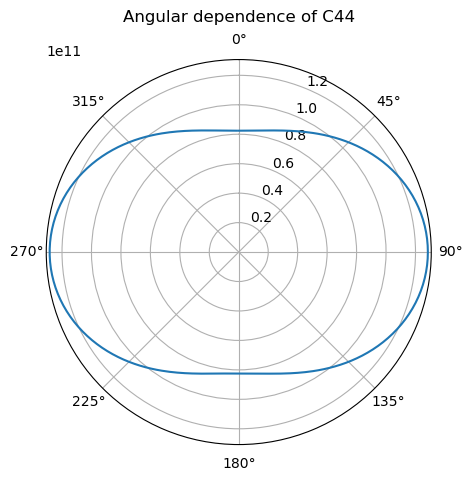

In [7]:
import numpy as np

theta = np.linspace(0 , 359, 360)
theta_deg = np.deg2rad(theta)
C44 = matl.C44 + np.sin(theta_deg) ** 2 * (matl.C66 - matl.C44)

import matplotlib.pyplot as plt
from pathlib import Path

plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)

ax.set_theta_zero_location('N')   # 0° at the top (North)
ax.set_theta_direction(-1)         # counterclockwise

ax.plot(theta_deg, C44)
ax.set_title("Angular dependence of C44", va='bottom')
plt.savefig(Path(IMAGE_DIR_WIN, fr'angular_dependence_C44.png'))


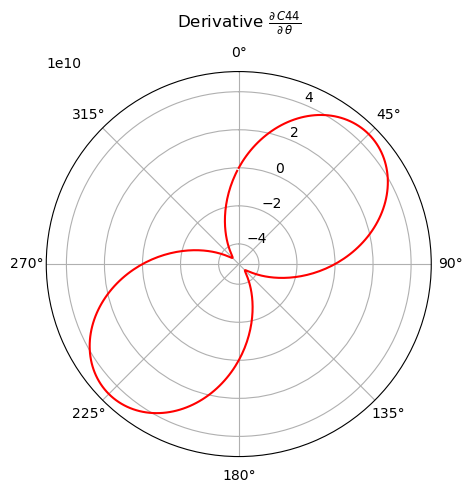

In [17]:
import numpy as np

d_C44 =np.sin(2*theta_deg) * (matl.C66 - matl.C44)

import matplotlib.pyplot as plt
from pathlib import Path

plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)

ax.set_theta_zero_location('N')   # 0° at the top (North)
ax.set_theta_direction(-1)         # counterclockwise

ax.plot(theta_deg, d_C44, color='red')
ax.set_title(r"Derivative $\frac{\partial \, C44}{ \partial \, \theta}$", va='bottom')
plt.savefig(Path(IMAGE_DIR_WIN, fr'angular_dependence_d_C44.png'))

In [14]:
np.linspace(0 , 360, 361)





array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
       128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159.,
     